In [10]:
from google.colab import files
uploaded = files.upload()

Saving Quality_Concrete PS-1.csv to Quality_Concrete PS-1.csv


In [28]:
import pandas as pd
df = pd.read_csv("Quality_Concrete PS-1.csv")
df

,Unnamed: 0,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
0,0,1119.324168,1,178.253002,526.051381,305.391066,1956.909586,2.019602
1,1,1036.079757,1,121.985937,751.978355,202.951022,1816.186138,5.979678
2,2,1533.371242,1,100.844370,1940.216276,158.901826,1850.391669,3.647249
3,3,530.060453,1,169.685077,1667.346846,312.075730,677.841225,5.598852
4,4,1633.186960,1,148.456935,1401.681101,204.934673,416.156446,4.234521
...,...,...,...,...,...,...,...,...
9995,1995,1160.140252,1,62.559394,1830.670755,170.911606,948.376706,2.898108
9996,1996,1810.432422,1,104.346350,1991.803437,282.877402,1964.359366,5.235614
9997,1997,1039.441333,1,172.193162,919.904749,160.812509,980.138093,4.058639
9998,1998,1637.732218,0,183.601604,1161.583133,83.375289,583.113548,5.399111


In [29]:
print("Dataset Overview:")
print(df.info())
print("\\nSummary Statistics:")
print(df.describe())
print("\\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   Chloride        10000 non-null  float64
 2   Label           10000 non-null  int64  
 3   Organic_Carbon  10000 non-null  float64
 4   Solids          10000 non-null  float64
 5   Sulphate        10000 non-null  float64
 6   Turbidity       10000 non-null  float64
 7   ph              10000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 625.1 KB
None
\nSummary Statistics:
         Unnamed: 0      Chloride         Label  Organic_Carbon        Solids  \
count  10000.000000  10000.000000  10000.000000    10000.000000  10000.000000   
mean    1699.500000   3209.816032      0.349000      289.310908   4706.413051   
std     1357.761983   1963.715379      0.476678      164.697936   3620.078892   
min        0.000000   

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # ✅ this line is essential


In [31]:
print("Dataset Overview:")
print(df.info())
print("\\nSummary Statistics:")
print(df.describe())
print("\\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   Chloride        10000 non-null  float64
 2   Label           10000 non-null  int64  
 3   Organic_Carbon  10000 non-null  float64
 4   Solids          10000 non-null  float64
 5   Sulphate        10000 non-null  float64
 6   Turbidity       10000 non-null  float64
 7   ph              10000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 625.1 KB
None
\nSummary Statistics:
         Unnamed: 0      Chloride         Label  Organic_Carbon        Solids  \
count  10000.000000  10000.000000  10000.000000    10000.000000  10000.000000   
mean    1699.500000   3209.816032      0.349000      289.310908   4706.413051   
std     1357.761983   1963.715379      0.476678      164.697936   3620.078892   
min        0.000000   

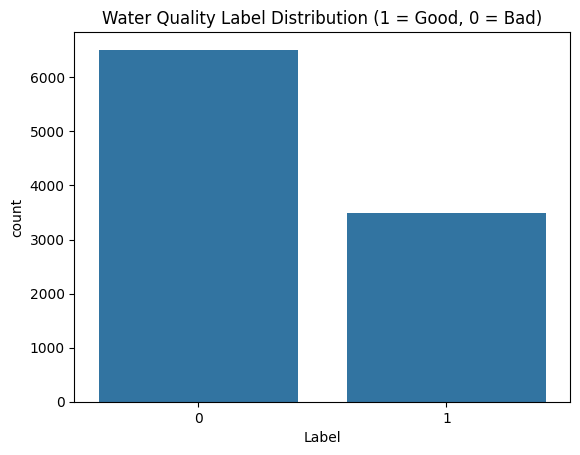

In [32]:
sns.countplot(x='Label', data=df)
plt.title('Water Quality Label Distribution (1 = Good, 0 = Bad)')
plt.show()

In [33]:
X = df.drop('Label', axis=1)
y = df['Label']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # ✅ Required for scaling


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<Axes: >

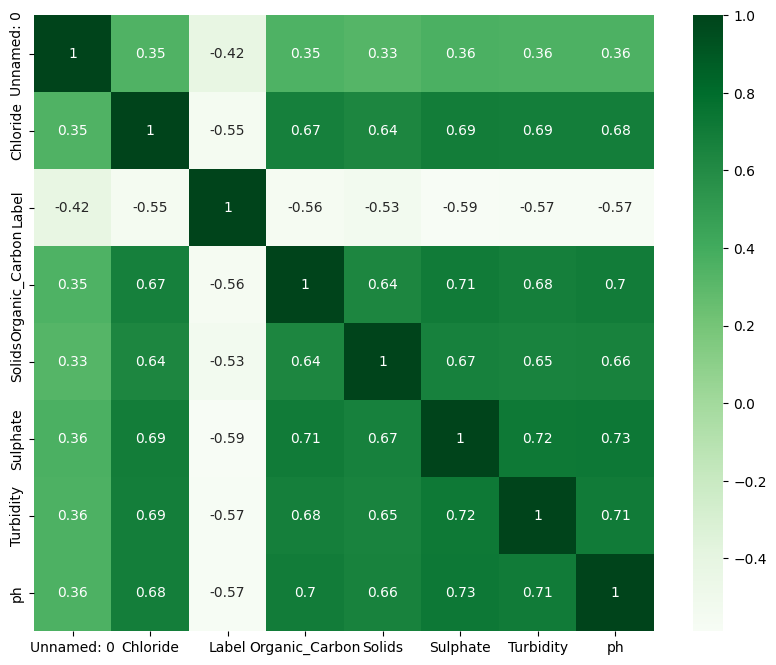

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [38]:
# Dropping the feature columns manually
x = df.drop(['Chloride', 'Organic_Carbon', 'Solids', 'Sulphate', 'Turbidity', 'ph'], axis=1)

# Use the correct label column name
y = df['Label']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}


In [43]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall (Sensitivity):", recall_score(y_true, y_pred))
    print("Specificity:", specificity)
    print("F1 Score:", f1_score(y_true, y_pred))

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



=== Logistic Regression ===
Confusion Matrix:
[[1113  188]
 [  98  601]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1301
           1       0.76      0.86      0.81       699

    accuracy                           0.86      2000
   macro avg       0.84      0.86      0.85      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy: 0.857
Precision: 0.761723700887199
Recall (Sensitivity): 0.8597997138769671
Specificity: 0.8554957724827056
F1 Score: 0.8077956989247311


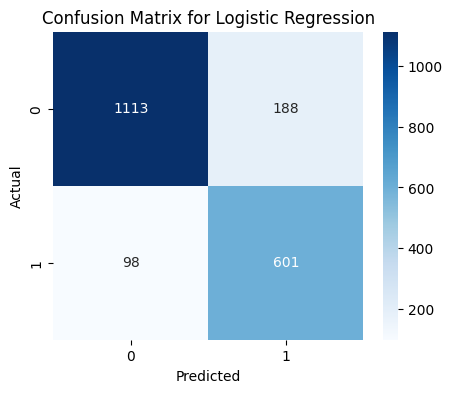


=== Decision Tree ===
Confusion Matrix:
[[1054  247]
 [ 268  431]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1301
           1       0.64      0.62      0.63       699

    accuracy                           0.74      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.74      0.74      0.74      2000

Accuracy: 0.7425
Precision: 0.6356932153392331
Recall (Sensitivity): 0.6165951359084406
Specificity: 0.8101460415065335
F1 Score: 0.625998547567175


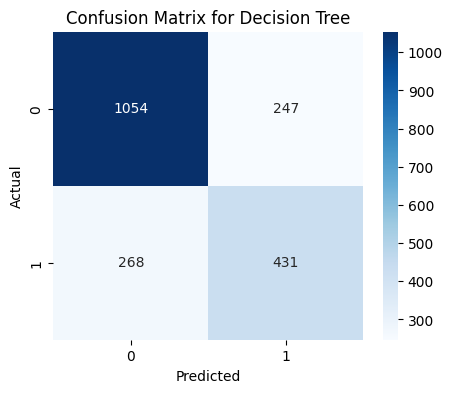


=== Random Forest ===
Confusion Matrix:
[[1108  193]
 [ 259  440]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1301
           1       0.70      0.63      0.66       699

    accuracy                           0.77      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.77      0.77      0.77      2000

Accuracy: 0.774
Precision: 0.6951026856240127
Recall (Sensitivity): 0.6294706723891274
Specificity: 0.851652574942352
F1 Score: 0.6606606606606606


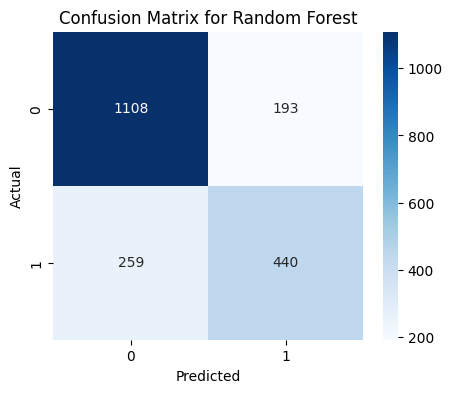


=== Support Vector Machine ===
Confusion Matrix:
[[1110  191]
 [  93  606]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1301
           1       0.76      0.87      0.81       699

    accuracy                           0.86      2000
   macro avg       0.84      0.86      0.85      2000
weighted avg       0.87      0.86      0.86      2000

Accuracy: 0.858
Precision: 0.7603513174404015
Recall (Sensitivity): 0.8669527896995708
Specificity: 0.8531898539584934
F1 Score: 0.8101604278074866


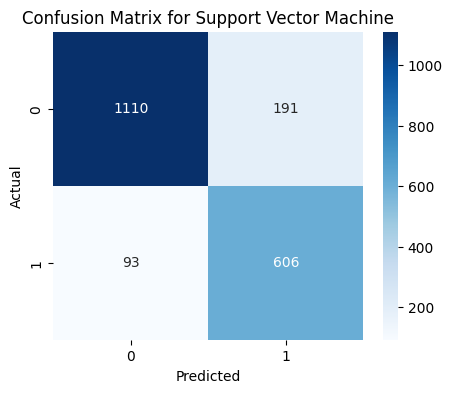

In [46]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(name, y_test, y_pred)